In [1]:
%pylab inline
import matplotlib as mpl
import csv
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib as mpl


cmap = [(255,0,2),
(228,0,28),
(201,1,54),
(170,86,82),
(138,199,110),
(108,199,138),
(79,85,168),
(51,0,197),
(25,0,227),
(0,0,255)]

color = mpl.colors.ListedColormap(np.array(cmap)/float(255)).colors


In [3]:
def H(n):
	"""Returns an approximate value of n-th harmonic number.

	   http://en.wikipedia.org/wiki/Harmonic_number
	"""
	# Euler-Mascheroni constant
	gamma = 0.57721566490153286060651209008240243104215933593992
	return gamma + log(n) + 0.5/n - 1./(12*n**2) + 1./(120*n**4)
H_vectorized = np.vectorize(H)

In [4]:
# compiles individual json files into csvs
#from json_to_csv import default_patterns, compile_from_json
#for pattern in default_patterns:
#    compile_from_json(*pattern)

In [7]:
df = pd.read_csv('./csvs_oct5/1stOrder_base.csv', index_col=0)


eccentricities_to_compare = {}
eccentricities_to_compare['areas'] = pd.unique(df['area'])

eccentricities_to_compare['1stOrder'] = {}
eccentricities_to_compare['CSCs'] = {}
eccentricities_to_compare['MutationResponse'] = {}

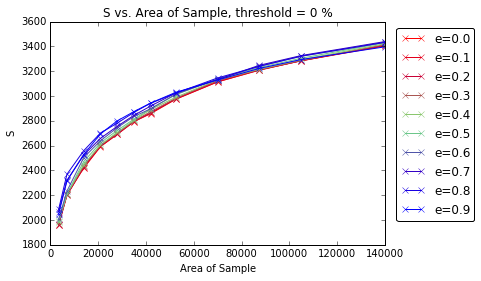

In [36]:

df = pd.read_csv('./csvs_oct5/1stOrder_base.csv', index_col=0)
unique_eccentricities = pd.unique(df['eccentricity'])

for index,ecc in enumerate(unique_eccentricities):
    subset = df[df['eccentricity']==ecc]
    x = subset['area']
    y = subset['S'] / H_vectorized(subset['N'])
    
    ecc = str(np.around(ecc, decimals=1))
    eccentricities_to_compare['1stOrder'][ecc] = eccentricities_to_compare['1stOrder'].get(ecc, {})
    eccentricities_to_compare['1stOrder'][ecc]['0%'] = subset['S'].values / H_vectorized(subset['N'])
    plt.plot(x,y, 'x-', label='e='+str(ecc), color=color[index])

plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), fancybox=True, ncol=1)
plt.title('S vs. Area of Sample, threshold = 0 %')
plt.ylabel('S')
plt.xlabel('Area of Sample')
# plt.ylim([-1,0.5])
    

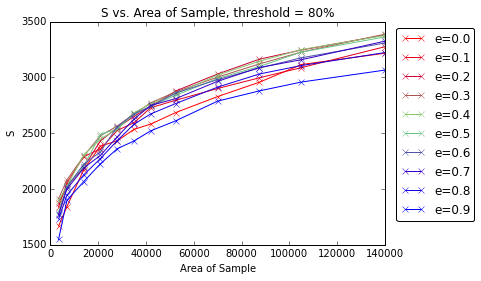

In [37]:
df = pd.read_csv('./csvs_oct5/1stOrder_cancer_80.csv', index_col=0)
unique_eccentricities = pd.unique(df['eccentricity'])

for index,ecc in enumerate(unique_eccentricities):
    subset = df[df['eccentricity']==ecc]
    x = subset['area']
    y = subset['S'] / H_vectorized(subset['N'])
    
    ecc = str(np.around(ecc, decimals=1))
    eccentricities_to_compare['1stOrder'][ecc] = eccentricities_to_compare['1stOrder'].get(ecc, {})
    eccentricities_to_compare['1stOrder'][ecc]['80%'] = subset['S'].values / H_vectorized(subset['N'])
    
    plt.plot(x,y, 'x-', label='e='+str(ecc), color=color[index])

plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), fancybox=True, ncol=1)
plt.title('S vs. Area of Sample, threshold = 80%')
plt.ylabel('S')
plt.xlabel('Area of Sample')
# plt.ylim([-1,0.5])
    

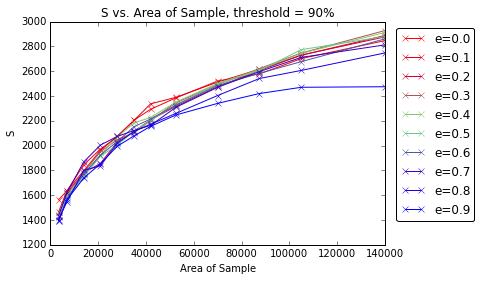

In [38]:
df = pd.read_csv('./csvs_oct5/1stOrder_cancer_90.csv', index_col=0)
unique_eccentricities = pd.unique(df['eccentricity'])

for index,ecc in enumerate(unique_eccentricities):
    subset = df[df['eccentricity']==ecc]
    x = subset['area']
    y = subset['S'] / H_vectorized(subset['N'])
    
    ecc = str(np.around(ecc, decimals=1))
    eccentricities_to_compare['1stOrder'][ecc] = eccentricities_to_compare['1stOrder'].get(ecc, {})
    eccentricities_to_compare['1stOrder'][ecc]['90%'] = subset['S'].values / H_vectorized(subset['N'])
    
    plt.plot(x,y, 'x-', label='e='+str(ecc), color=color[index])

plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), fancybox=True, ncol=1)
plt.title('S vs. Area of Sample, threshold = 90%')
plt.ylabel('S')
plt.xlabel('Area of Sample')
# plt.fill_between(eccentricities_to_compare['areas'], )
# plt.ylim([-1,0.5])
    

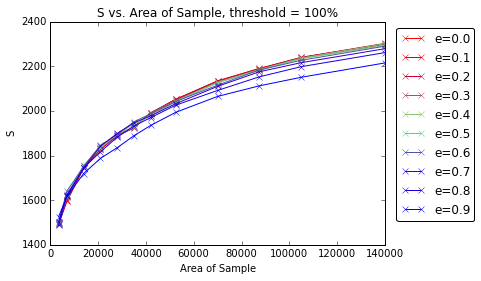

In [39]:
df = pd.read_csv('./csvs_oct5/1stOrder_cancer_only.csv', index_col=0)
unique_eccentricities = pd.unique(df['eccentricity'])

for index,ecc in enumerate(unique_eccentricities):
    subset = df[df['eccentricity']==ecc]
    x = subset['area']
    y = subset['S'] / H_vectorized(subset['N'])
    
    ecc = str(np.around(ecc, decimals=1))
    eccentricities_to_compare['1stOrder'][ecc] = eccentricities_to_compare['1stOrder'].get(ecc, {})
    eccentricities_to_compare['1stOrder'][ecc]['100%'] = subset['S'].values / H_vectorized(subset['N'])
    
    plt.plot(x,y, 'x-', label='e='+str(ecc), color=color[index])

plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), fancybox=True, ncol=1)
plt.title('S vs. Area of Sample, threshold = 100%')
plt.ylabel('S')
plt.xlabel('Area of Sample')
# plt.ylim([-1,0.5])
    

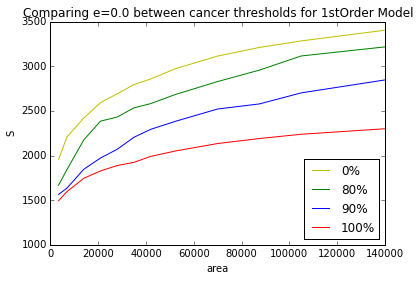

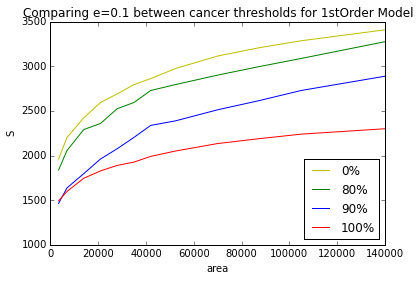

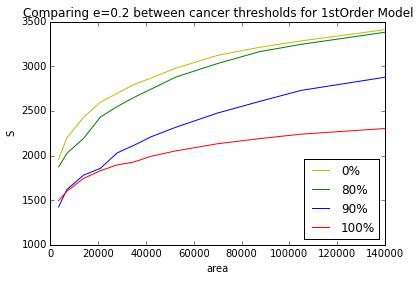

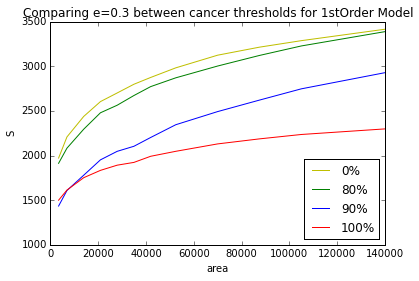

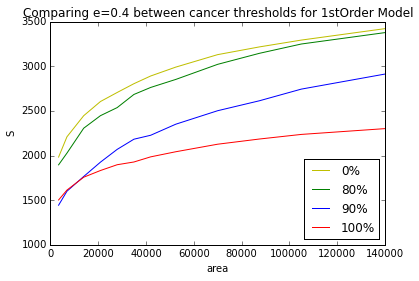

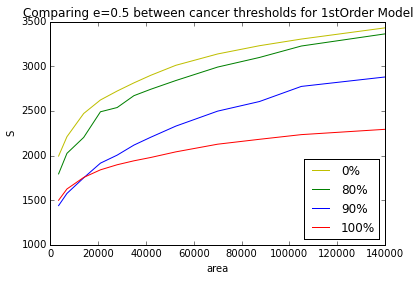

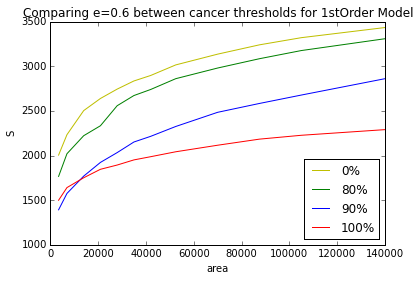

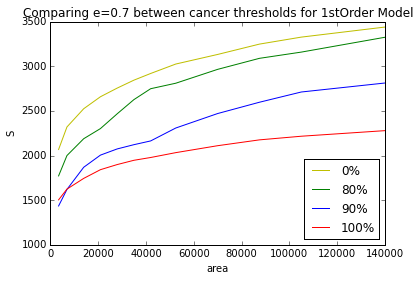

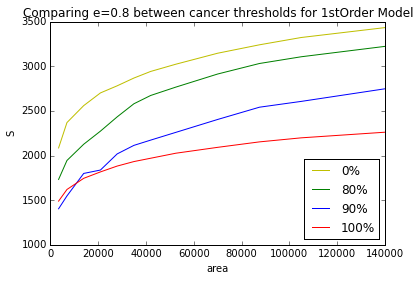

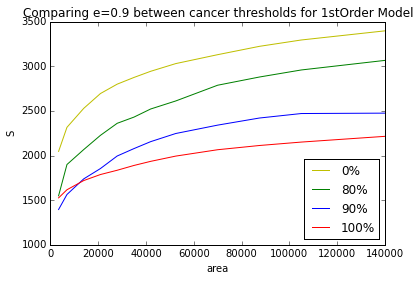

In [40]:
x = eccentricities_to_compare['areas']
for ecc, obj in sorted(eccentricities_to_compare['1stOrder'].items(), key=lambda x: x[0]):
    plt.figure()
    plt.plot(x, obj['0%'], label='0%', color='y')
    plt.plot(x, obj['80%'], label='80%', color='g')
    plt.plot(x, obj['90%'], label='90%', color='b')
    plt.plot(x, obj['100%'], label='100%', color='r')
    plt.legend(loc='lower right')

    plt.title('Comparing e='+str(ecc)+' between cancer thresholds for 1stOrder Model')
    plt.xlabel('area')
    plt.ylabel('S')


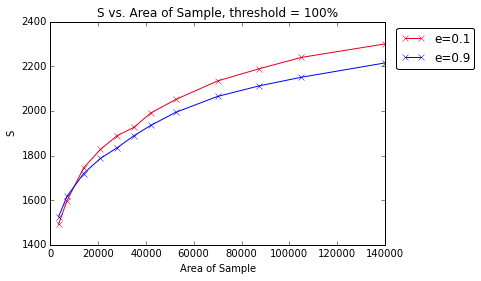

In [41]:

df = pd.read_csv('./csvs_oct5/1stOrder_cancer_only.csv', index_col=0)
unique_eccentricities = pd.unique(df['eccentricity'])

for index,ecc in enumerate(unique_eccentricities):
    subset = df[df['eccentricity']==ecc]
    if ecc not in [0.1, 0.9]:
        continue
        
    x = subset['area']
    y = subset['S'] / H_vectorized(subset['N'])
    
    ecc = str(np.around(ecc, decimals=1))
    eccentricities_to_compare['1stOrder'][ecc] = eccentricities_to_compare['1stOrder'].get(ecc, {})
    eccentricities_to_compare['1stOrder'][ecc]['100%'] = subset['S'].values / H_vectorized(subset['N'])
    
    plt.plot(x,y, 'x-', label='e='+str(ecc), color=color[index])

plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), fancybox=True, ncol=1)
plt.title('S vs. Area of Sample, threshold = 100%')
plt.ylabel('S')
plt.xlabel('Area of Sample')
# plt.ylim([-1,0.5])
    